In [ ]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

# Project 2

In [4]:
import pandas as pd

In [ ]:
#I have selected UN Consumer Price Index, because I haven't work extensively that
#Topic
#This work is based on a workteam with Federico Yepes, due to our similar interests
#About environmental regulations and market effects
#I have chosen UN datas because I worked with a similar one for Project 1

In [5]:
#data of CO2 (data.un.org): CO2 emissions estimates
un_co2 = pd.read_csv("/Users/jr/Desktop/Project2/SYB66_310_202310_Carbon Dioxide Emission Estimates.csv", 
                       encoding="ISO-8859-1", skiprows=1, header=0)
un_co2.columns=['N°', 'Country', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
un_co2
#The encoding, skiprows and header codes were recommended by online tutorials to open my file

,N°,Country,Year,Series,Value,Footnotes,Source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,"4,524",NaN,"International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,"7,145",NaN,"International Energy Agency, IEA World Energy ..."
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,"3,980",NaN,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,"4,074",NaN,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,"3,975",NaN,"International Energy Agency, IEA World Energy ..."
...,...,...,...,...,...,...,...
2259,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2260,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.8,NaN,"International Energy Agency, IEA World Energy ..."
2261,716,Zimbabwe,2018,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2262,716,Zimbabwe,2019,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."


In [6]:
#Veryfing the types of CO2 emissions in the data
unique_un_co2 = un_co2['Series'].unique()
print(unique_un_co2)

['Emissions (thousand metric tons of carbon dioxide)'
 'Emissions per capita (metric tons of carbon dioxide)']


In [10]:
#data of Consumer Price Index (UN): https://w3.unece.org/PXWeb/en/DataMap?IndicatorCode=1
un_cpi_preview = pd.read_csv("/Users/jr/Desktop/Project2/data_20241126154521.csv", 
                       encoding="ISO-8859-1")
#The encoding, skiprows and header codes were recommended by online tutorials to open my file
un_cpi = un_cpi_preview[['IndicatorName', 'CountryName', 'PeriodCode', 'Value']].reset_index(drop=True)

In [11]:
un_cpi.columns=['Indicator Name', 'Country', 'Year', 'Value']
un_cpi

,Indicator Name,Country,Year,Value
0,"Consumer price index, growth rate (%)",Albania,2005,2.4
1,"Consumer price index, growth rate (%)",Albania,2006,2.4
2,"Consumer price index, growth rate (%)",Albania,2007,2.9
3,"Consumer price index, growth rate (%)",Albania,2008,3.4
4,"Consumer price index, growth rate (%)",Albania,2009,2.3
...,...,...,...,...
1021,"Consumer price index, growth rate (%)",Uzbekistan,2019,14.5
1022,"Consumer price index, growth rate (%)",Uzbekistan,2020,12.9
1023,"Consumer price index, growth rate (%)",Uzbekistan,2021,10.8
1024,"Consumer price index, growth rate (%)",Uzbekistan,2022,11.4


In [12]:
#list of the non-country names (regions, sub-regions, continents and non
#recognized nations)
excluded_countries = [
    "Total, all countries or areas", "Africa", "Northern Africa", "Sub-Saharan Africa", "Eastern Africa", 
    "Middle Africa", "Southern Africa", "Western Africa", "Americas", 
    "Northern America", "Latin America & the Caribbean", "Caribbean", 
    "Central America", "South America", "Asia", "Central Asia", 
    "Eastern Asia", "South-central Asia", "South-eastern Asia", "Southern Asia", 
    "Western Asia", "Europe", "European Union (EU)","Eastern Europe", "Northern Europe", 
    "Southern Europe", "Western Europe", "Oceania", "Australia and New Zealand", 
    "Melanesia", "Micronesia", "Polynesia", "British Virgin Islands", 
    "Falkland Islands (Malvinas)", "Faroe Islands", "French Guiana", 
    "Guam", "New Caledonia", "Puerto Rico", "Saint Martin (French part)", 
    "Sint Maarten (Dutch part)", "Turks and Caicos Islands", 
    "United States Virgin Islands", "Other non-specified areas", 
    "LLDCs", "LDCs", "SIDS", "LDC§", "LLDC§", "SID§", "American Samoa", "Aruba", "Bermuda", "Bonaire, St. Eustatius & Saba", 
    "British Virgin Islands", "Cayman Islands", "Cook Islands", 
    "Falkland Islands (Malvinas)", "French Guiana", "French Polynesia", 
    "Guam", "Isle of Man", "Montserrat", "New Caledonia", "Niue", 
    "Northern Mariana Islands", "Puerto Rico", "Réunion", 
    "Saint Barthélemy", "Saint Helena", "Saint Martin (French part)", 
    "Sint Maarten (Dutch part)", "Tokelau", "Turks and Caicos Islands", 
    "United States Virgin Islands", "Wallis and Futuna Islands", 
    "Western Sahara", "Anguilla", "Aruba", "Bermuda", "Bonaire, St. Eustatius & Saba", 
    "British Virgin Islands", "Cayman Islands", "Cook Islands", 
    "Falkland Islands (Malvinas)", "French Guiana", "French Polynesia", 
    "Guam", "Isle of Man", "Montserrat", "New Caledonia", "Niue", 
    "Northern Mariana Islands", "Puerto Rico", "Réunion", 
    "Saint Barthélemy", "Saint Helena", "Saint Martin (French part)", 
    "Sint Maarten (Dutch part)", "Tokelau", "Turks and Caicos Islands", 
    "United States Virgin Islands", "Wallis and Futuna Islands", 
    "Western Sahara"
]

In [14]:
#To filter only the valid countries
countries = un_cpi[un_cpi["Country"].isin(excluded_countries) == False]
countries

,Indicator Name,Country,Year,Value
0,"Consumer price index, growth rate (%)",Albania,2005,2.4
1,"Consumer price index, growth rate (%)",Albania,2006,2.4
2,"Consumer price index, growth rate (%)",Albania,2007,2.9
3,"Consumer price index, growth rate (%)",Albania,2008,3.4
4,"Consumer price index, growth rate (%)",Albania,2009,2.3
...,...,...,...,...
1021,"Consumer price index, growth rate (%)",Uzbekistan,2019,14.5
1022,"Consumer price index, growth rate (%)",Uzbekistan,2020,12.9
1023,"Consumer price index, growth rate (%)",Uzbekistan,2021,10.8
1024,"Consumer price index, growth rate (%)",Uzbekistan,2022,11.4


In [16]:
#To convert the value column to a numeric format by removing commas and then coercing 
#non-numeric values to NaN (if any)
un_cpi['Value'] = un_cpi['Value'].astype(str).str.replace(',', '')
un_cpi['Value'] = pd.to_numeric(un_cpi['Value'], errors='coerce')

un_co2['Value'] = un_co2['Value'].astype(str).str.replace(',', '')
un_co2['Value'] = pd.to_numeric(un_co2['Value'], errors='coerce')

#drop rows where 'value' is NaN (non-valid values)
un_cpi = un_cpi.dropna(subset=['Value'])
un_co2 = un_co2.dropna(subset=['Value'])

#I have used the template I've used for Project 1

In [17]:
#Converting to string
countries['Year'] = countries['Year'].astype(str)
un_co2['Year'] = un_co2['Year'].astype(str)

In [19]:
#To verify the only index type in my data
unique_cpi = countries['Indicator Name'].unique()
print(unique_cpi)

['Consumer price index, growth rate (%)']


In [21]:
# Filter rows to have only "Emissions per capita (metric tons of carbon dioxide)
filtered_un_co2 = un_co2[un_co2['Series'] == 'Emissions per capita (metric tons of carbon dioxide)']
filtered_un_co2

,N°,Country,Year,Series,Value,Footnotes,Source
8,8,Albania,1975,Emissions per capita (metric tons of carbon di...,1.8,NaN,"International Energy Agency, IEA World Energy ..."
9,8,Albania,1985,Emissions per capita (metric tons of carbon di...,2.3,NaN,"International Energy Agency, IEA World Energy ..."
10,8,Albania,2005,Emissions per capita (metric tons of carbon di...,1.3,NaN,"International Energy Agency, IEA World Energy ..."
11,8,Albania,2010,Emissions per capita (metric tons of carbon di...,1.4,NaN,"International Energy Agency, IEA World Energy ..."
12,8,Albania,2015,Emissions per capita (metric tons of carbon di...,1.3,NaN,"International Energy Agency, IEA World Energy ..."
...,...,...,...,...,...,...,...
2259,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2260,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.8,NaN,"International Energy Agency, IEA World Energy ..."
2261,716,Zimbabwe,2018,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2262,716,Zimbabwe,2019,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."


In [37]:
#Merge
un_merged = pd.merge(countries, filtered_un_co2, on=['Country', 'Year'], how='inner')
un_merged.head()

,Indicator Name,Country,Year,Value_x,N°,Series,Value_y,Footnotes,Source
0,"Consumer price index, growth rate (%)",Albania,2005,2.4,8,Emissions per capita (metric tons of carbon di...,1.3,NaN,"International Energy Agency, IEA World Energy ..."
1,"Consumer price index, growth rate (%)",Albania,2010,3.6,8,Emissions per capita (metric tons of carbon di...,1.4,NaN,"International Energy Agency, IEA World Energy ..."
2,"Consumer price index, growth rate (%)",Albania,2015,1.9,8,Emissions per capita (metric tons of carbon di...,1.3,NaN,"International Energy Agency, IEA World Energy ..."
3,"Consumer price index, growth rate (%)",Albania,2018,2.0,8,Emissions per capita (metric tons of carbon di...,1.5,NaN,"International Energy Agency, IEA World Energy ..."
4,"Consumer price index, growth rate (%)",Albania,2019,1.4,8,Emissions per capita (metric tons of carbon di...,1.4,NaN,"International Energy Agency, IEA World Energy ..."


In [24]:
#Verifying the years
unique_serie = un_merged['Year'].unique()
print(unique_serie)

['2005' '2010' '2015' '2018' '2019' '2020']


In [38]:
#Range
un_merged['Value_x'] = pd.to_numeric(un_merged['Value_x'], errors='coerce')
un_merged['Value_y'] = pd.to_numeric(un_merged['Value_y'], errors='coerce')

#Dropping the NA
un_merged = un_merged.dropna(subset=['Value_x', 'Value_y'])

#Min and Max values
min_x = un_merged['Value_x'].min()
max_x = un_merged['Value_x'].max()

min_y = un_merged['Value_y'].min()
max_y = un_merged['Value_y'].max()

print(f"The range of 'Value_x' is from {min_x} to {max_x}.")
print(f"The range of 'Value_y' is from {min_y} to {max_y}.")

The range of 'Value_x' is from -2.1 to 48.7.
The range of 'Value_y' is from 0.3 to 24.7.


In [40]:
un_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 287
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  282 non-null    object 
 1   Country         282 non-null    object 
 2   Year            282 non-null    object 
 3   Value_x         282 non-null    float64
 4   N°              282 non-null    int64  
 5   Series          282 non-null    object 
 6   Value_y         282 non-null    float64
 7   Footnotes       38 non-null     object 
 8   Source          282 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 22.0+ KB


In [41]:
#I have chosen only 2019 because after the 2020, the CPI experienced significant 
#disruptions due to COVID and later because of the war in Ukraine
filtered_un_merged = un_merged[un_merged['Year'] == '2019']
filtered_un_merged

,Indicator Name,Country,Year,Value_x,N°,Series,Value_y,Footnotes,Source
4,"Consumer price index, growth rate (%)",Albania,2019,1.4,8,Emissions per capita (metric tons of carbon di...,1.4,NaN,"International Energy Agency, IEA World Energy ..."
10,"Consumer price index, growth rate (%)",Armenia,2019,1.4,51,Emissions per capita (metric tons of carbon di...,2.0,NaN,"International Energy Agency, IEA World Energy ..."
16,"Consumer price index, growth rate (%)",Austria,2019,1.5,40,Emissions per capita (metric tons of carbon di...,7.1,NaN,"International Energy Agency, IEA World Energy ..."
22,"Consumer price index, growth rate (%)",Azerbaijan,2019,2.6,31,Emissions per capita (metric tons of carbon di...,3.4,NaN,"International Energy Agency, IEA World Energy ..."
28,"Consumer price index, growth rate (%)",Belarus,2019,5.6,112,Emissions per capita (metric tons of carbon di...,5.9,NaN,"International Energy Agency, IEA World Energy ..."
34,"Consumer price index, growth rate (%)",Belgium,2019,1.4,56,Emissions per capita (metric tons of carbon di...,7.9,NaN,"International Energy Agency, IEA World Energy ..."
40,"Consumer price index, growth rate (%)",Bosnia and Herzegovina,2019,0.8,70,Emissions per capita (metric tons of carbon di...,6.3,NaN,"International Energy Agency, IEA World Energy ..."
46,"Consumer price index, growth rate (%)",Bulgaria,2019,3.1,100,Emissions per capita (metric tons of carbon di...,5.5,NaN,"International Energy Agency, IEA World Energy ..."
52,"Consumer price index, growth rate (%)",Canada,2019,1.9,124,Emissions per capita (metric tons of carbon di...,14.8,NaN,"International Energy Agency, IEA World Energy ..."
58,"Consumer price index, growth rate (%)",Croatia,2019,0.8,191,Emissions per capita (metric tons of carbon di...,3.8,NaN,"International Energy Agency, IEA World Energy ..."


In [ ]:
#Conceptual (Hypotesis Test)
#The higher the Consumer Price Index (CPI), the lower the CO2 emissions per country
#Justification: Economies with a higher CPI usually have stronger economies capable of investing 
#in cleaner technologies compared to other countries. This would substantially reduce CO2 emissions.
#Additionally, higher CPI economies often implement green practices that can incentivize a lower 
#carbon footprint.

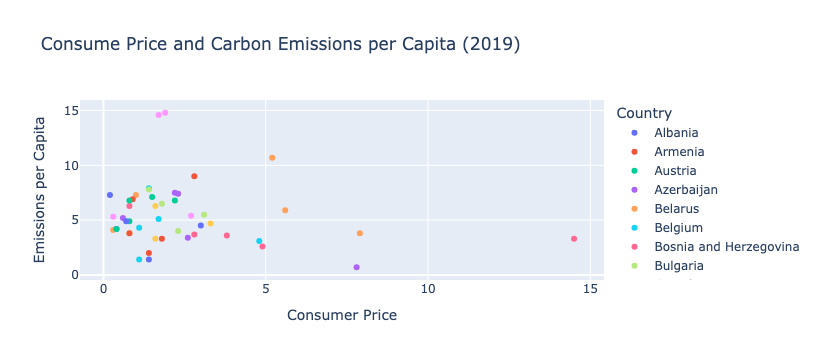

In [49]:
#Graph
import plotly.express as px
fig = px.scatter(
    filtered_un_merged,
    x="Value_x",  # x-axis (Consumer Price)
    y="Value_y",  # y-axis (Emissions per Capita)
    color="Country",
    title="Consume Price and Carbon Emissions per Capita (2019)",
    labels={"Value_x": "Consumer Price", "Value_y": "Emissions per Capita"},
)

# Show the plot
fig.show()

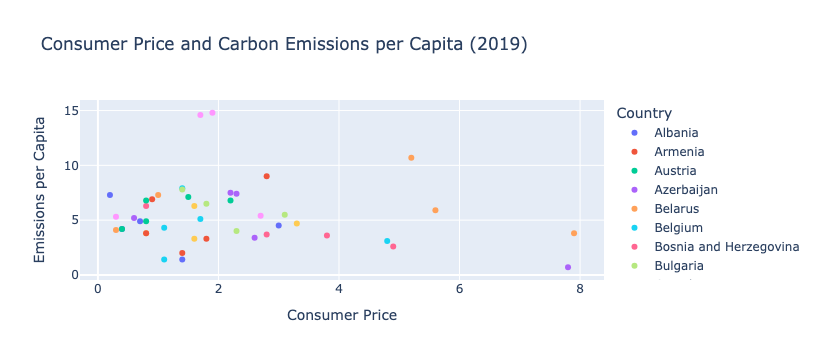

In [51]:
# Filter out the outlier (Uzbekistan)
filtered_un_merged = filtered_un_merged[filtered_un_merged['Country'] != 'Uzbekistan']

# Create the scatter plot
fig = px.scatter(
    filtered_un_merged,
    x="Value_x",  # Column for x-axis (Consumer Price)
    y="Value_y",  # Column for y-axis (Emissions per Capita)
    color="Country",
    title="Consumer Price and Carbon Emissions per Capita (2019)",
    labels={"Value_x": "Consumer Price", "Value_y": "Emissions per Capita"},
)

# Show the plot
fig.show()

In [ ]:
#As shown in the graphs, no correlation was found, even after removing the single outlier (Uzbekistan).

In [53]:
#Calculate Pearson Correlation: 
correlation_pearson = filtered_un_merged['Value_x'].corr(filtered_un_merged['Value_y'])
print(f"The Pearson Correlation is: {correlation_pearson}")

The Pearson Correlation is: -0.14094613498992617


In [ ]:
#The Pearson correlation result (-0.14) indicates a very weak negative correlation between the 
#two variables, and, if we take a stricter approach, we could conclude that due to the 
#lack of a significant effect, there is no linear relationship between the two variables.